In [1]:
!nvidia-smi

Thu Nov 25 04:19:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/My\ Drive


/content/drive/My Drive


In [ ]:
!unrar x "/content/drive/My Drive/darknet.rar" "/content/drive/My Drive/DN"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_02583_b.jpg      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_02583_b.txt      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_02602_b.jpg      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_02602_b.txt      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_04580_b.jpg      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_04580_b.txt      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_07249_b.jpg      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_07249_b.txt      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/data/dataset/0148_08252_b.jpg      28%  OK 
Extracting  /content/drive/My Drive/DN/darknet/da

In [4]:
cd DN/darknet

/content/drive/My Drive/DN/darknet


In [ ]:
!mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [ ]:
#Create train.txt
import os
import numpy as np
#"dataset" is folder have img and txt
lst_files = os.listdir("data/dataset/")
lst_images = []

for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)
    
#200 sample for valid
random_idx = np.random.randint(0, len(lst_images), 200)

#Create train.txt in darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/dataset/"+lst_images[idx]+"\n")
      
#Create valid.txt in darknet/data
with open("data/valid.txt","w") as f:
    for idx in random_idx:
      f.write("data/dataset/"+lst_images[idx]+"\n")

In [ ]:
!make

chmod +x *.sh


In [5]:
!chmod +x ./darknet

In [ ]:
import cv2

In [ ]:
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj2.cfg yolov4-tiny.conv.29 -map -dont_show > yolotinv4_lisenceplate.log

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.894794), count: 4, class_loss = 0.000002, iou_loss = 0.907752, total_loss = 0.907754 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.916866), count: 4, class_loss = 0.000049, iou_loss = 0.898142, total_loss = 0.898190 
 total_bbox = 189943, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.852230), count: 2, class_loss = 0.000096, iou_loss = 0.239155, total_loss = 0.239250 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.875139), count: 3, class_loss = 0.000181, iou_loss = 1.076868, total_loss = 1.077049 
 total_bbox = 189948, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.928252), count: 1, class_loss = 0.000029, iou_loss = 0.204505, total_loss = 0.204534 
v3 (iou

In [ ]:
!ls backup/

yolo-tinyv4-obj2_1000.weights  yolo-tinyv4-obj2_final.weights
yolo-tinyv4-obj2_2000.weights  yolo-tinyv4-obj2_last.weights
yolo-tinyv4-obj2_best.weights


In [13]:
import cv2

In [6]:
#predict 
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj2.cfg \
 backup/yolo-tinyv4-obj2_best.weights testimg.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	  

Img Predict is saved (ames predictions.jpg)

In [16]:
#show Predict Img
def show(path):
  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread(path)
  #reshape Img
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)

  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()
  

In [14]:
import os
os.getcwd()

'/content/drive/My Drive/DN/darknet'

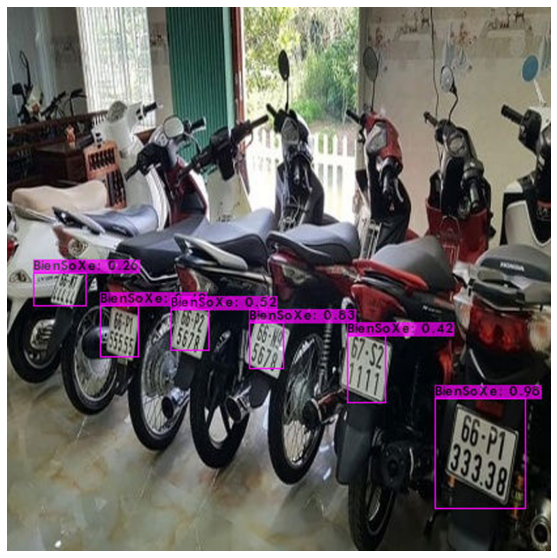

In [18]:
show('predictions.jpg')